## Convolve 1D

In [1]:
import sys
sys.path.append('..')

import numpy as np
import numpy.typing as npt

from pycsou.util import deps
from scipy import signal

if deps.cupy_enabled:
    import cupy as cp
    
import matplotlib.pyplot as plt

#### NumPy

In [2]:
from pycsou.linop.conv import Convolve1D

sig = np.repeat([0., 1., 0.], 10)
filter = signal.hann(5); filter[filter.size//2] = 0
ConvOp = Convolve1D(size = sig.size, filter=filter)
filtered = ConvOp * sig
filtered_scipy = signal.convolve(sig, filter, mode='same', method='direct')
np.allclose(filtered, filtered_scipy)

True

#### CuPy

In [ ]:
# Had to install the cusignal package: conda install -c rapidsai -c nvidia -c conda-forge cusignal=21.08

In [4]:
sig = cp.repeat(cp.array([0., 1., 0.]), 10)
filter = cp.hanning(5)
ConvOp = Convolve1D(size = sig.size, filter=filter)
filtered = ConvOp * sig
filtered_cp = cp.convolve(sig, filter, mode='same')
np.allclose(filtered, filtered_cp)

array(True)

In [5]:
import cusignal

### Convolve 2D

#### NumPy

In [7]:
from pycsou.linop.conv import Convolve2D

sig = np.zeros(shape=(100,100))
sig[sig.shape[0] // 2 - 2:sig.shape[0] // 2 + 3, sig.shape[1] // 2 - 2:sig.shape[1] // 2 + 3] = 1
filter = signal.hann(25); filter[filter.size//2:] = 0
filter = filter[None,:] * filter[:,None]
ConvOp = Convolve2D(size=sig.size, filter=filter, shape=sig.shape)
filtered = (ConvOp * sig.ravel()).reshape(sig.shape)
filtered_scipy = signal.convolve(sig, filter, mode='same', method='fft')
np.allclose(filtered, filtered_scipy)

True

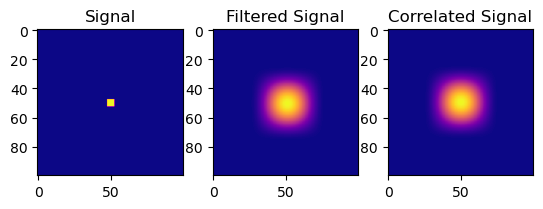

In [8]:
sig = np.zeros(shape=(100,100))
sig[sig.shape[0] // 2 - 2:sig.shape[0] // 2 + 3, sig.shape[1] // 2 - 2:sig.shape[1] // 2 + 3] = 1
filter = signal.hann(50)
filter = filter[None,:] * filter[:,None]
ConvOp = Convolve2D(size=sig.size, filter=filter, shape=sig.shape)
filtered = (ConvOp * sig.ravel()).reshape(sig.shape)
correlated = (ConvOp.H * sig.ravel()).reshape(sig.shape)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(sig, cmap='plasma'); plt.title('Signal')
plt.subplot(1,3,2)
plt.imshow(filtered, cmap='plasma'); plt.title('Filtered Signal')
plt.subplot(1,3,3)
plt.imshow(correlated, cmap='plasma'); plt.title('Correlated Signal')
plt.show()

#### CuPy

In [16]:
from cupyx.scipy.signal import convolve as cp_convolve

sig = cp.zeros(shape=(100,100))
sig[sig.shape[0] // 2 - 2:sig.shape[0] // 2 + 3, sig.shape[1] // 2 - 2:sig.shape[1] // 2 + 3] = 1
filter = cp.hanning(25); filter[filter.size//2:] = 0
filter = filter[None,:] * filter[:,None]
ConvOp = Convolve2D(size=sig.size, filter=filter, shape=sig.shape)
filtered = (ConvOp * sig.ravel()).reshape(sig.shape)
filtered_cp = cp_convolve(sig, filter, mode='same', method='fft')
np.allclose(filtered, filtered_cp)

array(True)

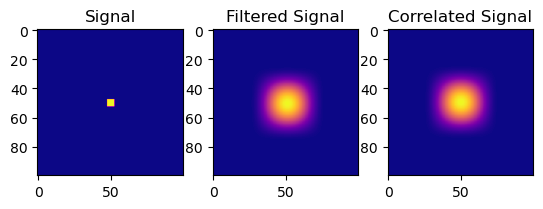

In [19]:
sig = cp.zeros(shape=(100,100))
sig[sig.shape[0] // 2 - 2:sig.shape[0] // 2 + 3, sig.shape[1] // 2 - 2:sig.shape[1] // 2 + 3] = 1
filter = cp.hanning(50)
filter = filter[None,:] * filter[:,None]
ConvOp = Convolve2D(size=sig.size, filter=filter, shape=sig.shape)
filtered = (ConvOp * sig.ravel()).reshape(sig.shape)
correlated = (ConvOp.H * sig.ravel()).reshape(sig.shape)

plt.subplot(1,3,1)
plt.imshow(cp.asnumpy(sig), cmap='plasma'); plt.title('Signal')
plt.subplot(1,3,2)
plt.imshow(cp.asnumpy(filtered), cmap='plasma'); plt.title('Filtered Signal')
plt.subplot(1,3,3)
plt.imshow(cp.asnumpy(correlated), cmap='plasma'); plt.title('Correlated Signal')
plt.show()

## MovingAverage1D

#### NumPy

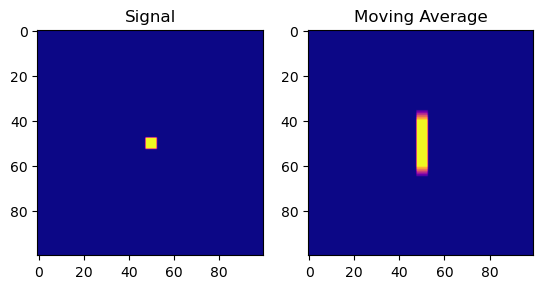

In [20]:
from pycsou.linop.conv import MovingAverage1D

sig = np.zeros(shape=(100,100))
sig[sig.shape[0] // 2 - 2:sig.shape[0] // 2 + 3, sig.shape[1] // 2 - 2:sig.shape[1] // 2 + 3] = 1
MAOp = MovingAverage1D(window_size=25, shape=sig.shape, axis=0)
moving_average = (MAOp * sig.ravel()).reshape(sig.shape)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sig, cmap='plasma'); plt.title('Signal')
plt.subplot(1,2,2)
plt.imshow(moving_average, cmap='plasma'); plt.title('Moving Average')
plt.show()

#### CuPy

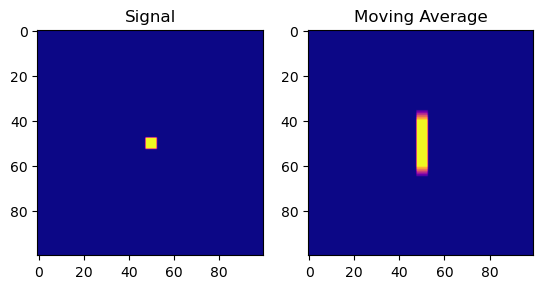

In [21]:
from pycsou.linop.conv import MovingAverage1D

sig = cp.zeros(shape=(100,100))
sig[sig.shape[0] // 2 - 2:sig.shape[0] // 2 + 3, sig.shape[1] // 2 - 2:sig.shape[1] // 2 + 3] = 1
MAOp = MovingAverage1D(window_size=25, shape=sig.shape, axis=0)
moving_average = (MAOp * sig.ravel()).reshape(sig.shape)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(cp.asnumpy(sig), cmap='plasma'); plt.title('Signal')
plt.subplot(1,2,2)
plt.imshow(cp.asnumpy(moving_average), cmap='plasma'); plt.title('Moving Average')
plt.show()

## MovingAverage2D

#### NumPy

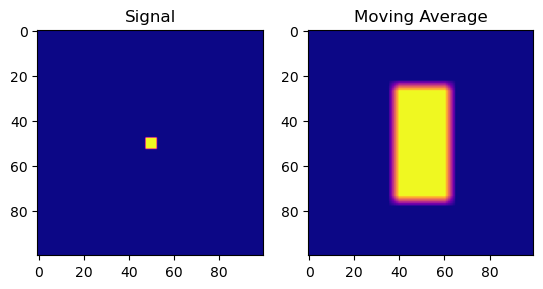

In [22]:
from pycsou.linop.conv import MovingAverage2D

sig = np.zeros(shape=(100,100))
sig[sig.shape[0] // 2 - 2:sig.shape[0] // 2 + 3, sig.shape[1] // 2 - 2:sig.shape[1] // 2 + 3] = 1
MAOp = MovingAverage2D(window_shape=(50,25), shape=sig.shape)
moving_average = (MAOp * sig.ravel()).reshape(sig.shape)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(sig, cmap='plasma'); plt.title('Signal')
plt.subplot(1,2,2)
plt.imshow(moving_average, cmap='plasma'); plt.title('Moving Average')
plt.show()

#### CuPy

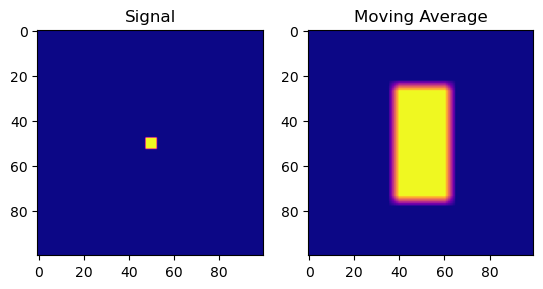

In [25]:
sig = cp.zeros(shape=(100,100))
sig[sig.shape[0] // 2 - 2:sig.shape[0] // 2 + 3, sig.shape[1] // 2 - 2:sig.shape[1] // 2 + 3] = 1
MAOp = MovingAverage2D(window_shape=(50,25), shape=sig.shape)
moving_average = (MAOp * sig.ravel()).reshape(sig.shape)

plt.subplot(1,2,1)
plt.imshow(cp.asnumpy(sig), cmap='plasma'); plt.title('Signal')
plt.subplot(1,2,2)
plt.imshow(cp.asnumpy(moving_average), cmap='plasma'); plt.title('Moving Average')
plt.show()

method

<module 'numpy' from '/home/andresmntr/anaconda3/envs/pycsou37/lib/python3.7/site-packages/numpy/__init__.py'>
<module 'cupy' from '/home/andresmntr/anaconda3/envs/pycsou37/lib/python3.7/site-packages/cupy/__init__.py'>
<module 'dask.array' from '/home/andresmntr/anaconda3/envs/pycsou37/lib/python3.7/site-packages/dask/array/__init__.py'>
<module 'jax.numpy' from '/home/andresmntr/anaconda3/envs/pycsou37/lib/python3.7/site-packages/jax/numpy/__init__.py'>
